# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [52]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [53]:
#Cargamos dataset a utilizar
car = pd.read_csv('./car_evaluation.csv', header=None)

## Análisis exploratorio de datos

In [54]:
#Visualizacion del dataframe
car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [55]:
#Analizamos el shape del objeto
print(car.shape)

(1728, 7)


In [56]:
#Vamos a renombrar las columnas de manera correcta
column_names = ['price2buy', 'costs2keep', 'doors', 'persons','lug_boot', 'safety', 'rating']
car.columns = column_names

In [57]:
#Vericamos la transformacion
car.head(5)

,price2buy,costs2keep,doors,persons,lug_boot,safety,rating
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [58]:
#Visualizamos los tipos de datos
car.dtypes

price2buy     object
costs2keep    object
doors         object
persons       object
lug_boot      object
safety        object
rating        object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos son el precio de compra, costo de mantenimiento, # de puertas, # de personas, tamaño de la maleta, seguridad y el rating o score.
* El rating es la variable de destino o target y toma los valores **unacc, acc, good, vgood** (acc = acceptable).

In [59]:
# Exploremos un poco mas la variable target
car['rating'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: rating, dtype: int64

In [60]:
#Verificamos si hay valores faltantes en el dataset
car.isnull().sum()

price2buy     0
costs2keep    0
doors         0
persons       0
lug_boot      0
safety        0
rating        0
dtype: int64

## Procesamiento de datos

In [61]:
#Separamos en X e y
X = car.drop(['rating'], axis = 1)
y = car['rating']

In [62]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [63]:
#Veamos que obtuvimos en tamaños de train y test para X
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [64]:
y_train.shape, y_test.shape

((1209,), (519,))

In [65]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,price2buy,costs2keep,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [66]:
X_train.dtypes

price2buy     object
costs2keep    object
doors         object
persons       object
lug_boot      object
safety        object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [67]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce #antes instalar con: pip install category-encoders 

cols2transform = ['price2buy', 'costs2keep', 'doors', 'persons','lug_boot', 'safety']
encoder = ce.OrdinalEncoder(cols = cols2transform)

X_train = encoder.fit_transform(X_train) #Reescribimos X_train

X_test = encoder.fit_transform(X_test) #Reescribimos X_test

In [68]:
#Verificamos la transformacion
X_train.head()

,price2buy,costs2keep,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


En la variable price2buy, por ejemplo, ahora:

1 = med

2 = high

3 = low

In [69]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)

In [70]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [71]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [72]:
y_train_pred_tree

array(['acc', 'unacc', 'acc', ..., 'acc', 'unacc', 'acc'], dtype=object)

## Evaluación del modelo de clasificación con árbol de decisión (métricas)

In [73]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El acc en train es:', train_accuracy_tree)
print('El acc en test es:', test_accuracy_tree)

El acc en train es: 0.8180314309346567
El acc en test es: 0.4951830443159923


Se probó modificar el depth del arbol y se puede observar que a medida que aumenta la profundidad del arbol(cantidad de bifurcaciones a partir del nodo raiz sin incluirlo) el accuracy en train aumenta. La explicación es que el modelo esta sobreajustado a la data de entrenamiento, lo que explica que los resultados de test no mejoren.

[0.11974242 0.0517585  0.         0.30820076 0.         0.52029831]
Index(['price2buy', 'costs2keep', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


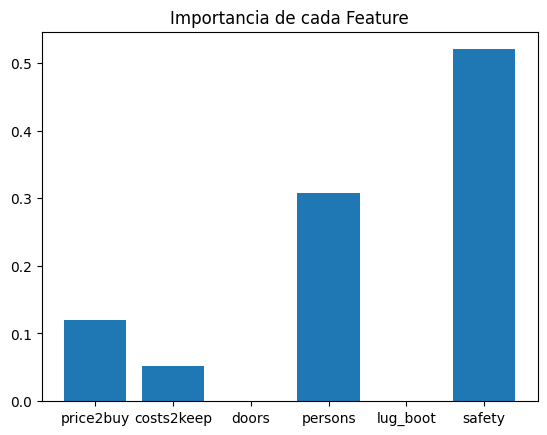

In [74]:
#Verificamos la importancia de cada feature

importances = tree.feature_importances_
features = X.columns
print(importances)
print(features)
plt.bar(features, importances)
plt.title('Importancia de cada Feature')
plt.show()

Al cambiar el depth del arbol se le da importancia a tantos features como depth tenga el arbol.
Si la profundidad es 2 solo se le dara importancia a dos features. De igual forma unos features tendran mas relevancia que otros y el feature que va entrando a medida que se aumenta el depth es el siguiente con mayor importancia de los que no estan incluidos

En pocas palabras el ajuste se basa en eliminar features menos importantes para no overfittear el modelo.

## Entrenamiento de modelo de clasificación con random forest

In [75]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [76]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [77]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('El acc en train es:', train_accuracy_rf)
print('El acc en test es:', test_accuracy_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

El acc en train es: 0.9942100909842845
El acc en test es: 0.5202312138728323


In [78]:
# Visualizacion de las feature importantes
feature_importances = pd.Series(rf.feature_importances_, index = X.columns.sort_values(ascending = False))
feature_importances

safety        0.226386
price2buy     0.140068
persons       0.076404
lug_boot      0.212589
doors         0.090112
costs2keep    0.254441
dtype: float64

[0.22638622 0.14006772 0.07640406 0.21258899 0.09011227 0.25444074]
Index(['price2buy', 'costs2keep', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


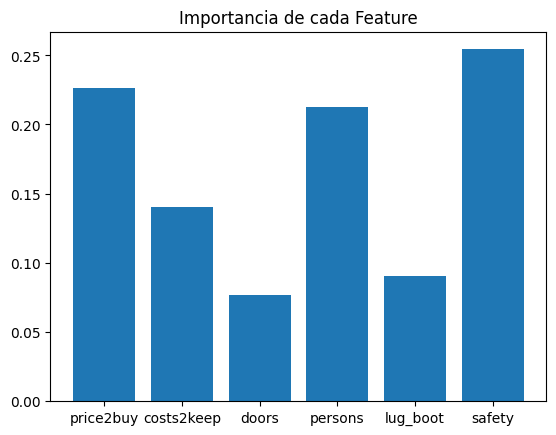

In [79]:
#Grafico de barras

importances = rf.feature_importances_
index = X.columns
print(importances)
print(features)
plt.bar(features, importances)
plt.title('Importancia de cada Feature')
plt.show()

In [80]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)

print('Matriz de confusion\n\n', cm)

Matriz de confusion

 [[ 18   0  96   4]
 [  3   0  15   1]
 [ 83  18 249   8]
 [  5   0  16   3]]


In [81]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.17      0.15      0.16       118
        good       0.00      0.00      0.00        19
       unacc       0.66      0.70      0.68       358
       vgood       0.19      0.12      0.15        24

    accuracy                           0.52       519
   macro avg       0.25      0.24      0.25       519
weighted avg       0.50      0.52      0.51       519

